# 🚗 Análise Comparativa de Heurísticas de Tráfego Urbano

Análise detalhada e comparativa entre diferentes estratégias de controle de semáforos, incluindo métricas avançadas de performance, congestionamento e backlog.

## Métricas Coletadas

### 📊 Informações da Simulação
| Métrica | Descrição | Unidade |
|---------|-----------|---------|
| **Heurística** | Estratégia de controle utilizada | - |
| **Duração Solicitada** | Tempo de simulação planejado | segundos |
| **Duração Real** | Tempo real de execução | segundos |
| **Grade** | Tamanho da malha viária | - |
| **FPS** | Frames por segundo da simulação | fps |

### 🚗 Métricas de Performance
| Métrica | Descrição | Cálculo no Código | Unidade |
|---------|-----------|-------------------|---------|
| **Veículos Concluídos** | Total de veículos que completaram a simulação | Contador incremental quando `veiculo.ativo = False` | unidades |
| **Throughput por Minuto** | Taxa de processamento de veículos | `veiculos_concluidos / (duracao_real / 60)` | veículos/min |
| **Eficiência Média** | Percentual de tempo em movimento vs tempo total | `((tempo_viagem - tempo_parado) / tempo_viagem) * 100` | % |
| **Score da Heurística** | Pontuação composta de desempenho | `(0.5 * tm_norm + 0.3 * tp_norm + 0.2 * v_norm) * 100` | 0-100 |

### ⏱️ Métricas de Tempo
| Métrica | Descrição | Cálculo no Código | Unidade |
|---------|-----------|-------------------|---------|
| **Tempo de Viagem Médio** | Tempo total que um veículo leva para completar sua jornada | `tempo_viagem_total / veiculos_concluidos / FPS` | segundos |
| **Tempo Parado Médio** | Tempo médio que veículos ficam parados (velocidade < 0.1) | `tempo_parado_total / veiculos_concluidos / FPS` | segundos |
| **Tempo de Viagem P50** | Mediana dos tempos de viagem | Percentil 50 dos tempos de viagem | segundos |
| **Tempo de Viagem P95** | Percentil 95 dos tempos de viagem | Percentil 95 dos tempos de viagem | segundos |

### 🏃 Métricas de Velocidade
| Métrica | Descrição | Cálculo no Código | Unidade |
|---------|-----------|-------------------|---------|
| **Velocidade Média Global** | Velocidade média considerando todos os veículos | `soma_velocidades / total_veiculos` | px/s |
| **Velocidade Média Ativa** | Velocidade média apenas dos veículos em movimento | `soma_velocidades_ativas / veiculos_ativos` | px/s |
| **Velocidade Máxima** | Velocidade máxima configurada | Valor de configuração | px/s |

### 🚦 Métricas de Congestionamento
| Métrica | Descrição | Cálculo no Código | Unidade |
|---------|-----------|-------------------|---------|
| **Paradas Médias por Veículo** | Número médio de paradas por veículo | `total_paradas / veiculos_concluidos` | paradas/veículo |
| **Veículos Aguardando (Instante)** | Veículos aguardando no momento da medição | Contagem instantânea | unidades |
| **Maior Fila em Cruzamento** | Maior fila observada em qualquer cruzamento | `max(filas_cruzamentos)` | veículos |

### 📦 Métricas de Backlog
| Métrica | Descrição | Cálculo no Código | Unidade |
|---------|-----------|-------------------|---------|
| **Backlog Total Atual** | Total de veículos no backlog no momento | Contagem instantânea | unidades |
| **Backlog Máximo Total** | Maior backlog observado durante a simulação | `max(backlog_historico)` | unidades |
| **Backlog Gerado Total** | Total de veículos gerados para o backlog | Contador incremental | unidades |
| **Backlog Despachado Total** | Total de veículos despachados do backlog | Contador incremental | unidades |
| **Backlog Médio** | Média do backlog durante toda a simulação | `soma_backlog / numero_medicoes` | unidades |

### ⚙️ Configuração da Simulação
| Métrica | Descrição | Unidade |
|---------|-----------|---------|
| **Taxa de Geração** | Taxa de geração de novos veículos | veículos/frame |
| **FPS Simulação** | Frames por segundo da simulação | fps |
| **Intervalo Métricas** | Intervalo entre coleta de métricas | frames |

## Detalhes dos Cálculos

### Tempo de Viagem
- **Rastreamento**: Cada veículo incrementa `tempo_viagem` a cada frame
- **Cálculo**: Soma total dividida pelo número de veículos concluídos
- **Normalização**: Convertido de frames para segundos dividindo por FPS
- **Percentis**: P50 (mediana) e P95 calculados para análise de distribuição

### Tempo Parado
- **Condição**: Velocidade < 0.1 (considerado parado)
- **Rastreamento**: Incrementado a cada frame quando veículo está parado
- **Uso**: Indicador de congestionamento e eficiência do tráfego

### Score da Heurística
- **Componentes**:
  - `tm_norm`: Tempo médio normalizado (0-1, melhor = menor tempo)
  - `tp_norm`: Tempo parado normalizado (0-1, melhor = menor tempo)
  - `v_norm`: Veículos processados normalizados (0-1, melhor = mais veículos)
- **Pesos**: 50% tempo viagem + 30% tempo parado + 20% throughput
- **Escala**: 0-100 pontos

### Eficiência
- **Fórmula**: `(Tempo em Movimento / Tempo Total) * 100`
- **Interpretação**: 100% = veículo nunca parou, 0% = veículo sempre parado
- **Uso**: Medida de fluidez do tráfego

### Backlog
- **Geração**: Veículos são adicionados ao backlog quando não conseguem prosseguir
- **Despacho**: Veículos são removidos do backlog quando podem prosseguir
- **Eficiência**: `(Despachados / Gerados) * 100`
- **Uso**: Indicador de capacidade do sistema de processar demanda

## Coleta de Dados

- **Frequência**: A cada `CONFIG.INTERVALO_METRICAS` frames (padrão: 5 segundos)
- **Armazenamento**: Listas por heurística no `GerenciadorMetricas`
- **Exportação**: Relatórios JSON com timestamp automático
- **Localização**: Diretório `relatorios/`

## Interpretação dos Resultados

### Métricas de Performance
- **Throughput Alto**: Mais veículos processados por unidade de tempo
- **Eficiência Alta**: Tráfego fluido, poucas interrupções
- **Score Alto**: Combinação equilibrada de todas as métricas

### Métricas de Tempo
- **Tempo de Viagem Baixo**: Heurística eficiente, menos congestionamento
- **Tempo Parado Baixo**: Melhor controle de fluxo, menos esperas
- **P95 Baixo**: Consistência na performance, poucos casos extremos

### Métricas de Velocidade
- **Velocidade Global Alta**: Sistema eficiente em geral
- **Velocidade Ativa Alta**: Boa fluidez quando em movimento
- **Diferença Pequena**: Pouco tempo perdido em paradas

### Métricas de Congestionamento
- **Paradas por Veículo Baixas**: Menos interrupções no fluxo
- **Veículos Aguardando Poucos**: Sistema processando demanda eficientemente
- **Filas Pequenas**: Bom controle de fluxo nos cruzamentos

### Métricas de Backlog
- **Eficiência Alta**: Sistema processando bem a demanda
- **Backlog Atual Baixo**: Poucos veículos aguardando processamento
- **Backlog Máximo Controlado**: Sistema não sobrecarregado

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import numpy as np

# Configuração para português
plt.rcParams['font.family'] = 'DejaVu Sans'
sns.set_style("whitegrid")
sns.set_palette("husl")


In [9]:
# Carrega os relatórios
def carregar_relatorios():
    relatorios = []
    arquivos = [
        "relatorios/relatorio_vertical_horizontal_20251007_225024.json",
        "relatorios/relatorio_random_open_close_20251007_225444.json"
    ]
    
    for arquivo in arquivos:
        with open(arquivo, 'r', encoding='utf-8') as f:
            data = json.load(f)
            relatorio = {
                # Informações da simulação
                'heuristica': data['simulacao']['heuristica'],
                'duracao_solicitada': data['simulacao']['duracao_solicitada'],
                'duracao_real': data['simulacao']['duracao_real'],
                'grade': data['simulacao']['grade'],
                'fps': data['simulacao']['fps'],
                
                # Métricas básicas
                'veiculos_concluidos': data['metricas']['veiculos_concluidos'],
                'tempo_viagem_medio': data['metricas']['tempo_viagem_medio'],
                'tempo_parado_medio': data['metricas']['tempo_parado_medio'],
                'eficiencia_media': data['metricas']['eficiencia_media'],
                'score_heuristica': data['metricas']['score_heuristica'],
                
                # Métricas de velocidade
                'velocidade_media_global_px_s': data['metricas']['velocidade_media_global_px_s'],
                'velocidade_media_ativa': data['metricas']['velocidade_media_ativa'],
                
                # Métricas de paradas e congestionamento
                'paradas_media_por_veiculo': data['metricas']['paradas_media_por_veiculo'],
                'veiculos_aguardando_instante': data['metricas']['veiculos_aguardando_instante'],
                'maior_fila_cruzamento_atual': data['metricas']['maior_fila_cruzamento_atual'],
                
                # Percentis de tempo de viagem
                'tempo_viagem_p50': data['metricas']['tempo_viagem_p50'],
                'tempo_viagem_p95': data['metricas']['tempo_viagem_p95'],
                
                # Throughput
                'throughput_por_minuto': data['metricas']['throughput_por_minuto'],
                
                # Métricas de backlog
                'backlog_total_atual': data['metricas']['backlog_total_atual'],
                'backlog_max_total': data['metricas']['backlog_max_total'],
                'backlog_gerado_total': data['metricas']['backlog_gerado_total'],
                'backlog_despachado_total': data['metricas']['backlog_despachado_total'],
                'backlog_medio': data['metricas']['backlog_medio'],
                
                # Configuração
                'taxa_geracao': data['configuracao']['taxa_geracao'],
                'velocidade_max': data['configuracao']['velocidade_max'],
                'fps_simulacao': data['configuracao']['fps_simulacao'],
                'intervalo_metricas': data['configuracao']['intervalo_metricas']
            }
            relatorios.append(relatorio)
    
    return pd.DataFrame(relatorios)

df = carregar_relatorios()
print("📊 Dados carregados com sucesso!")
print(f"🔍 Heurísticas analisadas: {', '.join(df['heuristica'].tolist())}")
print(f"📈 Total de registros: {len(df)}")
df


📊 Dados carregados com sucesso!
🔍 Heurísticas analisadas: VERTICAL_HORIZONTAL, RANDOM_OPEN_CLOSE
📈 Total de registros: 2


,heuristica,duracao_solicitada,duracao_real,grade,fps,veiculos_concluidos,tempo_viagem_medio,tempo_parado_medio,eficiencia_media,score_heuristica,...,throughput_por_minuto,backlog_total_atual,backlog_max_total,backlog_gerado_total,backlog_despachado_total,backlog_medio,taxa_geracao,velocidade_max,fps_simulacao,intervalo_metricas
0,VERTICAL_HORIZONTAL,200,200.010945,3x3,60,536,57.898725,19.857338,65.703324,27.211133,...,100.421546,764,764,1432,668,373.941868,0.012,1.0,60,300
1,RANDOM_OPEN_CLOSE,200,200.009343,3x3,60,497,62.885446,23.483602,62.656540,27.383365,...,101.855858,639,641,1262,623,303.101901,0.012,1.0,60,300


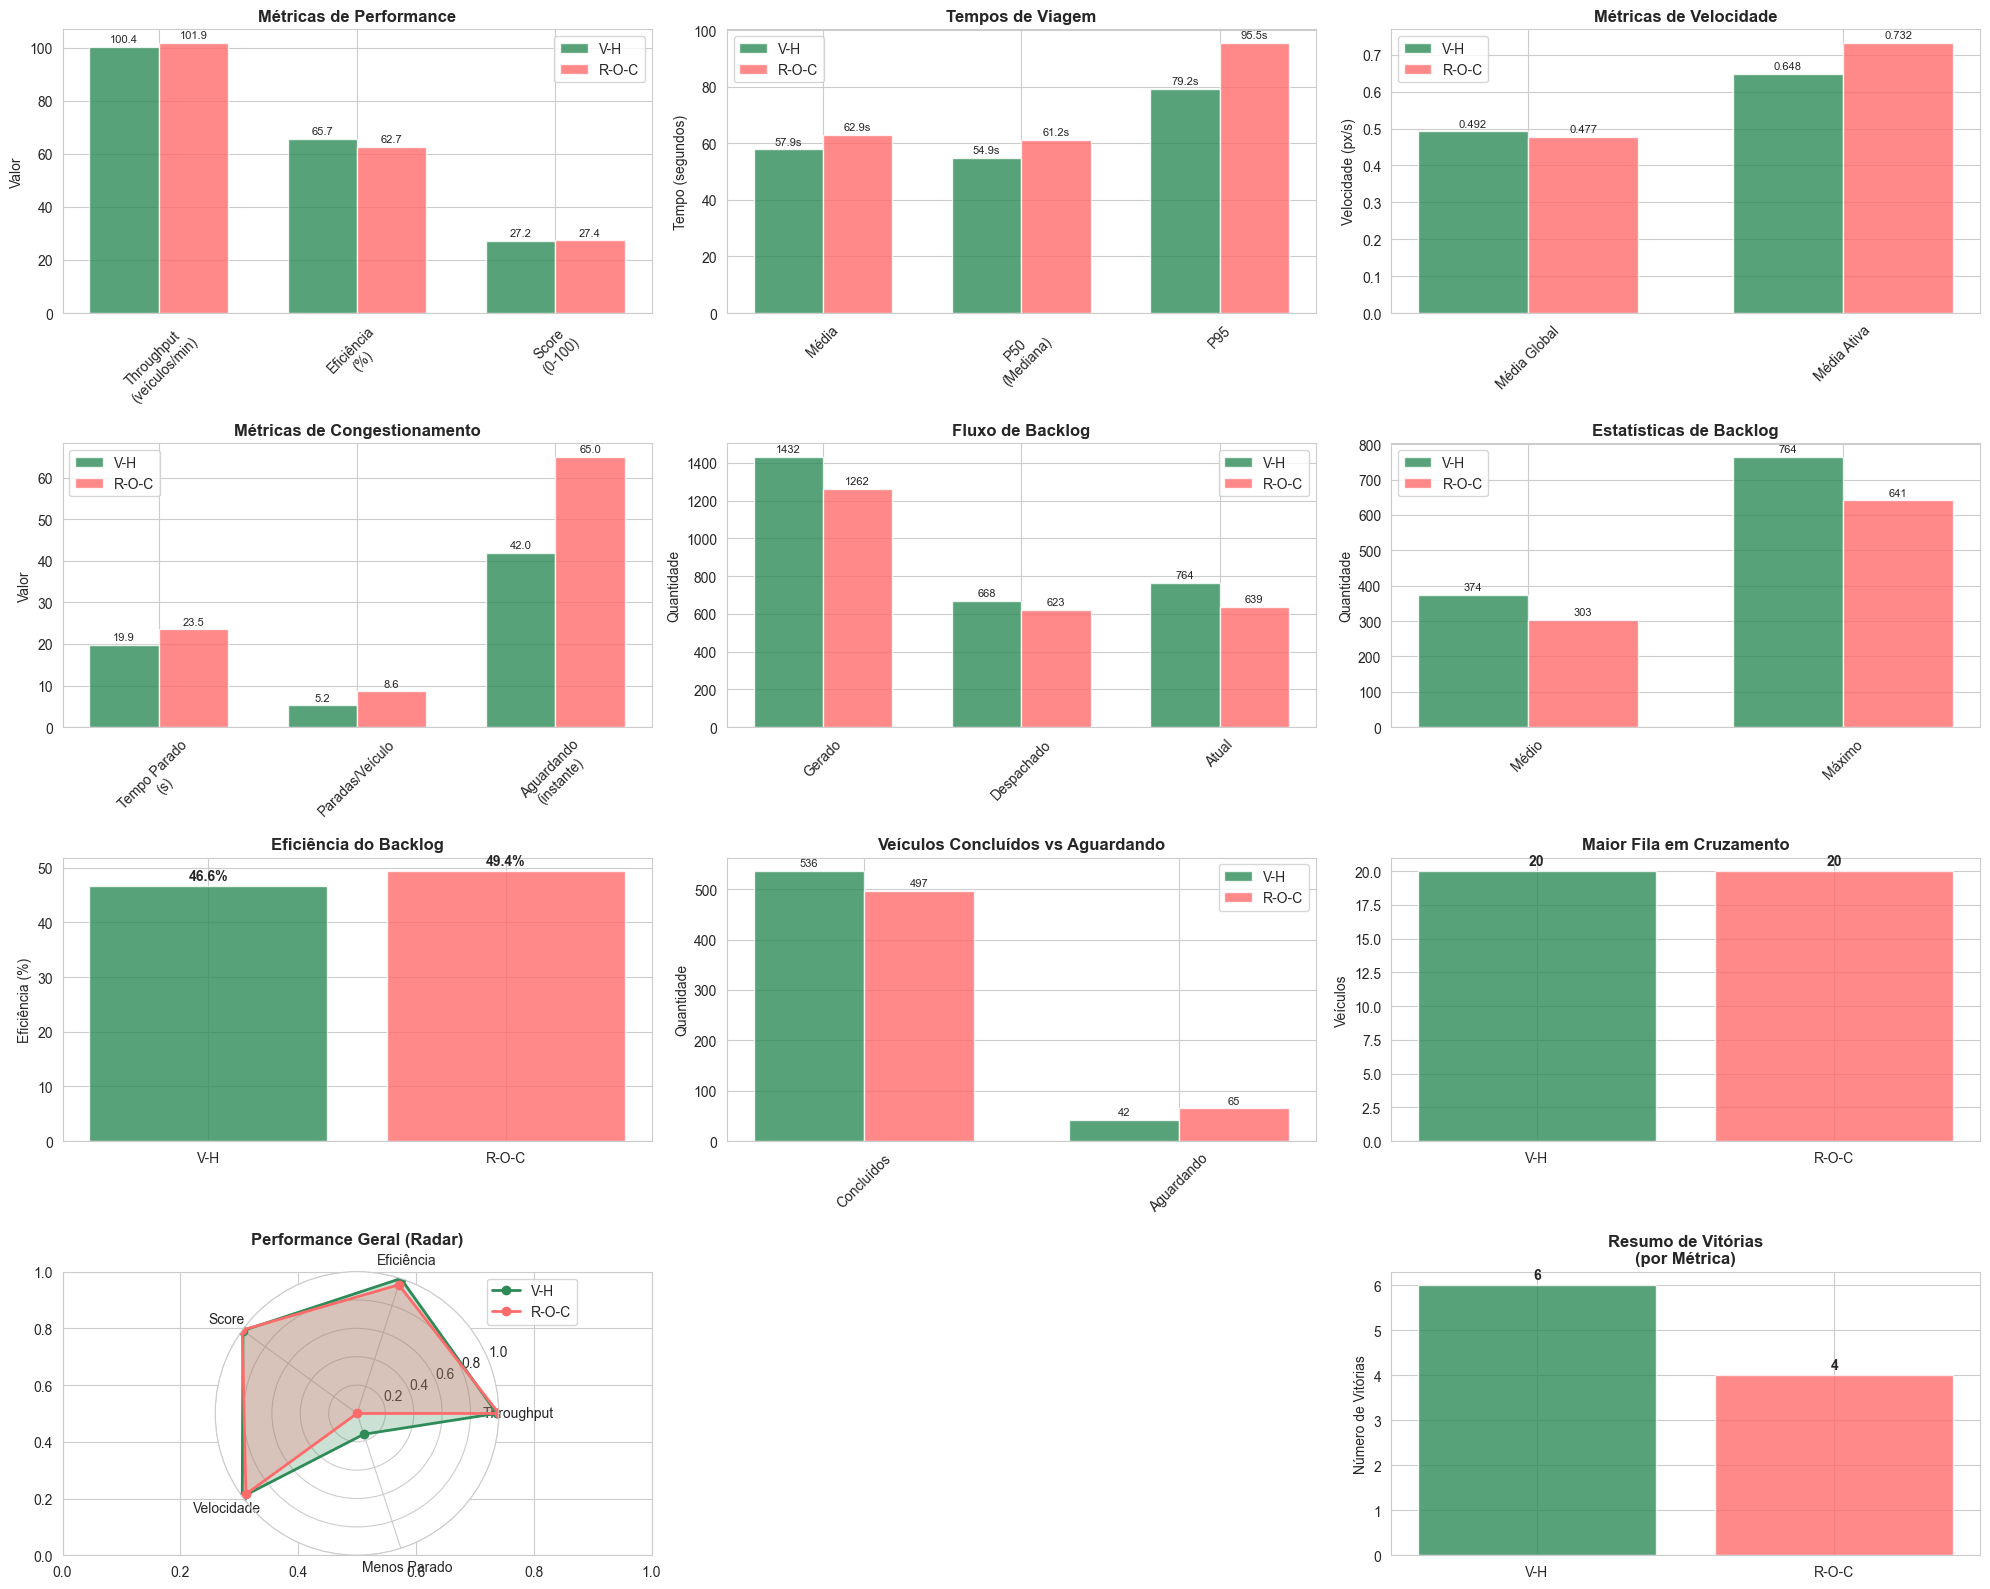

In [14]:
# Visualizações Comparativas entre Heurísticas
plt.figure(figsize=(20, 16))

# Cores para as heurísticas
cores = {'VERTICAL_HORIZONTAL': '#2E8B57', 'RANDOM_OPEN_CLOSE': '#FF6B6B'}
nomes_curtos = {'VERTICAL_HORIZONTAL': 'V-H', 'RANDOM_OPEN_CLOSE': 'R-O-C'}

# Gráfico 1: Métricas de Performance
plt.subplot(4, 3, 1)
metricas_perf = ['throughput_por_minuto', 'eficiencia_media', 'score_heuristica']
x = np.arange(len(metricas_perf))
width = 0.35

vh_vals = [df[df['heuristica'] == 'VERTICAL_HORIZONTAL'][m].iloc[0] for m in metricas_perf]
roc_vals = [df[df['heuristica'] == 'RANDOM_OPEN_CLOSE'][m].iloc[0] for m in metricas_perf]

bars1 = plt.bar(x - width/2, vh_vals, width, label='V-H', color=cores['VERTICAL_HORIZONTAL'], alpha=0.8)
bars2 = plt.bar(x + width/2, roc_vals, width, label='R-O-C', color=cores['RANDOM_OPEN_CLOSE'], alpha=0.8)

plt.title('Métricas de Performance', fontweight='bold')
plt.ylabel('Valor')
plt.xticks(x, ['Throughput\n(veículos/min)', 'Eficiência\n(%)', 'Score\n(0-100)'], rotation=45)
plt.legend()

# Adicionar valores nas barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + max(max(vh_vals), max(roc_vals))*0.01,
                f'{height:.1f}', ha='center', va='bottom', fontsize=8)

# Gráfico 2: Tempos de Viagem
plt.subplot(4, 3, 2)
tempos_metricas = ['tempo_viagem_medio', 'tempo_viagem_p50', 'tempo_viagem_p95']
x = np.arange(len(tempos_metricas))

vh_tempos = [df[df['heuristica'] == 'VERTICAL_HORIZONTAL'][m].iloc[0] for m in tempos_metricas]
roc_tempos = [df[df['heuristica'] == 'RANDOM_OPEN_CLOSE'][m].iloc[0] for m in tempos_metricas]

bars1 = plt.bar(x - width/2, vh_tempos, width, label='V-H', color=cores['VERTICAL_HORIZONTAL'], alpha=0.8)
bars2 = plt.bar(x + width/2, roc_tempos, width, label='R-O-C', color=cores['RANDOM_OPEN_CLOSE'], alpha=0.8)

plt.title('Tempos de Viagem', fontweight='bold')
plt.ylabel('Tempo (segundos)')
plt.xticks(x, ['Média', 'P50\n(Mediana)', 'P95'], rotation=45)
plt.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + max(max(vh_tempos), max(roc_tempos))*0.01,
                f'{height:.1f}s', ha='center', va='bottom', fontsize=8)

# Gráfico 3: Velocidades
plt.subplot(4, 3, 3)
vel_metricas = ['velocidade_media_global_px_s', 'velocidade_media_ativa']
x = np.arange(len(vel_metricas))

vh_vel = [df[df['heuristica'] == 'VERTICAL_HORIZONTAL'][m].iloc[0] for m in vel_metricas]
roc_vel = [df[df['heuristica'] == 'RANDOM_OPEN_CLOSE'][m].iloc[0] for m in vel_metricas]

bars1 = plt.bar(x - width/2, vh_vel, width, label='V-H', color=cores['VERTICAL_HORIZONTAL'], alpha=0.8)
bars2 = plt.bar(x + width/2, roc_vel, width, label='R-O-C', color=cores['RANDOM_OPEN_CLOSE'], alpha=0.8)

plt.title('Métricas de Velocidade', fontweight='bold')
plt.ylabel('Velocidade (px/s)')
plt.xticks(x, ['Média Global', 'Média Ativa'], rotation=45)
plt.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + max(max(vh_vel), max(roc_vel))*0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# Gráfico 4: Congestionamento
plt.subplot(4, 3, 4)
congest_metricas = ['tempo_parado_medio', 'paradas_media_por_veiculo', 'veiculos_aguardando_instante']
x = np.arange(len(congest_metricas))

vh_congest = [df[df['heuristica'] == 'VERTICAL_HORIZONTAL'][m].iloc[0] for m in congest_metricas]
roc_congest = [df[df['heuristica'] == 'RANDOM_OPEN_CLOSE'][m].iloc[0] for m in congest_metricas]

bars1 = plt.bar(x - width/2, vh_congest, width, label='V-H', color=cores['VERTICAL_HORIZONTAL'], alpha=0.8)
bars2 = plt.bar(x + width/2, roc_congest, width, label='R-O-C', color=cores['RANDOM_OPEN_CLOSE'], alpha=0.8)

plt.title('Métricas de Congestionamento', fontweight='bold')
plt.ylabel('Valor')
plt.xticks(x, ['Tempo Parado\n(s)', 'Paradas/Veículo', 'Aguardando\n(instante)'], rotation=45)
plt.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + max(max(vh_congest), max(roc_congest))*0.01,
                f'{height:.1f}', ha='center', va='bottom', fontsize=8)

# Gráfico 5: Backlog - Fluxo
plt.subplot(4, 3, 5)
backlog_metricas = ['backlog_gerado_total', 'backlog_despachado_total', 'backlog_total_atual']
x = np.arange(len(backlog_metricas))

vh_backlog = [df[df['heuristica'] == 'VERTICAL_HORIZONTAL'][m].iloc[0] for m in backlog_metricas]
roc_backlog = [df[df['heuristica'] == 'RANDOM_OPEN_CLOSE'][m].iloc[0] for m in backlog_metricas]

bars1 = plt.bar(x - width/2, vh_backlog, width, label='V-H', color=cores['VERTICAL_HORIZONTAL'], alpha=0.8)
bars2 = plt.bar(x + width/2, roc_backlog, width, label='R-O-C', color=cores['RANDOM_OPEN_CLOSE'], alpha=0.8)

plt.title('Fluxo de Backlog', fontweight='bold')
plt.ylabel('Quantidade')
plt.xticks(x, ['Gerado', 'Despachado', 'Atual'], rotation=45)
plt.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + max(max(vh_backlog), max(roc_backlog))*0.01,
                f'{height:.0f}', ha='center', va='bottom', fontsize=8)

# Gráfico 6: Backlog - Estatísticas
plt.subplot(4, 3, 6)
backlog_stats_metricas = ['backlog_medio', 'backlog_max_total']
x = np.arange(len(backlog_stats_metricas))

vh_backlog_stats = [df[df['heuristica'] == 'VERTICAL_HORIZONTAL'][m].iloc[0] for m in backlog_stats_metricas]
roc_backlog_stats = [df[df['heuristica'] == 'RANDOM_OPEN_CLOSE'][m].iloc[0] for m in backlog_stats_metricas]

bars1 = plt.bar(x - width/2, vh_backlog_stats, width, label='V-H', color=cores['VERTICAL_HORIZONTAL'], alpha=0.8)
bars2 = plt.bar(x + width/2, roc_backlog_stats, width, label='R-O-C', color=cores['RANDOM_OPEN_CLOSE'], alpha=0.8)

plt.title('Estatísticas de Backlog', fontweight='bold')
plt.ylabel('Quantidade')
plt.xticks(x, ['Médio', 'Máximo'], rotation=45)
plt.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + max(max(vh_backlog_stats), max(roc_backlog_stats))*0.01,
                f'{height:.0f}', ha='center', va='bottom', fontsize=8)

# Gráfico 7: Eficiência do Backlog (Comparação)
plt.subplot(4, 3, 7)
vh_eff = (df[df['heuristica'] == 'VERTICAL_HORIZONTAL']['backlog_despachado_total'].iloc[0] / 
          df[df['heuristica'] == 'VERTICAL_HORIZONTAL']['backlog_gerado_total'].iloc[0]) * 100
roc_eff = (df[df['heuristica'] == 'RANDOM_OPEN_CLOSE']['backlog_despachado_total'].iloc[0] / 
           df[df['heuristica'] == 'RANDOM_OPEN_CLOSE']['backlog_gerado_total'].iloc[0]) * 100

bars = plt.bar(['V-H', 'R-O-C'], [vh_eff, roc_eff], color=[cores['VERTICAL_HORIZONTAL'], cores['RANDOM_OPEN_CLOSE']], alpha=0.8)
plt.title('Eficiência do Backlog', fontweight='bold')
plt.ylabel('Eficiência (%)')

for bar, value in zip(bars, [vh_eff, roc_eff]):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + max(vh_eff, roc_eff)*0.01,
            f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

# Gráfico 8: Veículos Concluídos vs Aguardando
plt.subplot(4, 3, 8)
concluidos_metricas = ['veiculos_concluidos', 'veiculos_aguardando_instante']
x = np.arange(len(concluidos_metricas))

vh_concluidos = [df[df['heuristica'] == 'VERTICAL_HORIZONTAL'][m].iloc[0] for m in concluidos_metricas]
roc_concluidos = [df[df['heuristica'] == 'RANDOM_OPEN_CLOSE'][m].iloc[0] for m in concluidos_metricas]

bars1 = plt.bar(x - width/2, vh_concluidos, width, label='V-H', color=cores['VERTICAL_HORIZONTAL'], alpha=0.8)
bars2 = plt.bar(x + width/2, roc_concluidos, width, label='R-O-C', color=cores['RANDOM_OPEN_CLOSE'], alpha=0.8)

plt.title('Veículos Concluídos vs Aguardando', fontweight='bold')
plt.ylabel('Quantidade')
plt.xticks(x, ['Concluídos', 'Aguardando'], rotation=45)
plt.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + max(max(vh_concluidos), max(roc_concluidos))*0.01,
                f'{height:.0f}', ha='center', va='bottom', fontsize=8)

# Gráfico 9: Maior Fila por Cruzamento
plt.subplot(4, 3, 9)
vh_fila = df[df['heuristica'] == 'VERTICAL_HORIZONTAL']['maior_fila_cruzamento_atual'].iloc[0]
roc_fila = df[df['heuristica'] == 'RANDOM_OPEN_CLOSE']['maior_fila_cruzamento_atual'].iloc[0]

bars = plt.bar(['V-H', 'R-O-C'], [vh_fila, roc_fila], color=[cores['VERTICAL_HORIZONTAL'], cores['RANDOM_OPEN_CLOSE']], alpha=0.8)
plt.title('Maior Fila em Cruzamento', fontweight='bold')
plt.ylabel('Veículos')

for bar, value in zip(bars, [vh_fila, roc_fila]):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + max(vh_fila, roc_fila)*0.01,
            f'{value}', ha='center', va='bottom', fontweight='bold')

# Gráfico 10: Radar Chart - Performance Geral
plt.subplot(4, 3, 10)
# Normalizar métricas para radar chart (0-1)
metricas_radar = ['throughput_por_minuto', 'eficiencia_media', 'score_heuristica', 'velocidade_media_global_px_s']
vh_radar = []
roc_radar = []

for m in metricas_radar:
    vh_val = df[df['heuristica'] == 'VERTICAL_HORIZONTAL'][m].iloc[0]
    roc_val = df[df['heuristica'] == 'RANDOM_OPEN_CLOSE'][m].iloc[0]
    max_val = max(vh_val, roc_val)
    vh_radar.append(vh_val / max_val)
    roc_radar.append(roc_val / max_val)

# Para tempo parado, queremos o menor valor como melhor
tempo_parado_vh = df[df['heuristica'] == 'VERTICAL_HORIZONTAL']['tempo_parado_medio'].iloc[0]
tempo_parado_roc = df[df['heuristica'] == 'RANDOM_OPEN_CLOSE']['tempo_parado_medio'].iloc[0]
max_tempo_parado = max(tempo_parado_vh, tempo_parado_roc)
vh_radar.append(1 - (tempo_parado_vh / max_tempo_parado))  # Inverter para que menor seja melhor
roc_radar.append(1 - (tempo_parado_roc / max_tempo_parado))

metricas_radar_labels = ['Throughput', 'Eficiência', 'Score', 'Velocidade', 'Menos Parado']

angles = np.linspace(0, 2 * np.pi, len(metricas_radar_labels), endpoint=False).tolist()
vh_radar += vh_radar[:1]  # Fechar o círculo
roc_radar += roc_radar[:1]
angles += angles[:1]

ax = plt.subplot(4, 3, 10, projection='polar')
ax.plot(angles, vh_radar, 'o-', linewidth=2, label='V-H', color=cores['VERTICAL_HORIZONTAL'])
ax.fill(angles, vh_radar, alpha=0.25, color=cores['VERTICAL_HORIZONTAL'])
ax.plot(angles, roc_radar, 'o-', linewidth=2, label='R-O-C', color=cores['RANDOM_OPEN_CLOSE'])
ax.fill(angles, roc_radar, alpha=0.25, color=cores['RANDOM_OPEN_CLOSE'])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metricas_radar_labels)
ax.set_ylim(0, 1)
ax.set_title('Performance Geral (Radar)', fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

# Gráfico 11: Resumo de Vitórias
plt.subplot(4, 3, 12)
# Contar vitórias em cada métrica
vitorias_vh = 0
vitorias_roc = 0

metricas_vitoria = ['throughput_por_minuto', 'eficiencia_media', 'score_heuristica', 
                   'velocidade_media_global_px_s', 'velocidade_media_ativa']

for m in metricas_vitoria:
    vh_val = df[df['heuristica'] == 'VERTICAL_HORIZONTAL'][m].iloc[0]
    roc_val = df[df['heuristica'] == 'RANDOM_OPEN_CLOSE'][m].iloc[0]
    if vh_val > roc_val:
        vitorias_vh += 1
    else:
        vitorias_roc += 1

# Métricas onde menor é melhor
metricas_menor_melhor = ['tempo_viagem_medio', 'tempo_parado_medio', 'paradas_media_por_veiculo', 
                        'veiculos_aguardando_instante', 'backlog_total_atual']

for m in metricas_menor_melhor:
    vh_val = df[df['heuristica'] == 'VERTICAL_HORIZONTAL'][m].iloc[0]
    roc_val = df[df['heuristica'] == 'RANDOM_OPEN_CLOSE'][m].iloc[0]
    if vh_val < roc_val:
        vitorias_vh += 1
    else:
        vitorias_roc += 1

bars = plt.bar(['V-H', 'R-O-C'], [vitorias_vh, vitorias_roc], 
               color=[cores['VERTICAL_HORIZONTAL'], cores['RANDOM_OPEN_CLOSE']], alpha=0.8)
plt.title('Resumo de Vitórias\n(por Métrica)', fontweight='bold')
plt.ylabel('Número de Vitórias')

for bar, value in zip(bars, [vitorias_vh, vitorias_roc]):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + max(vitorias_vh, vitorias_roc)*0.01,
            f'{value}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()
